In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats 
import os 

### Sampling distribution 

Real-world data often does not follow a normal distribution and tends to have skewed distributions. However, normal distribution has desirable properties such as symmetry and the majority of data points being clustered within a few standard deviations from the mean. These properties make it useful for statistical analysis and modeling.


Samples taken from skewed distributions also tend to have skewed distributions. 

Conditions: 

- independence : observations are independent, otherwise statistics will be affected by the other samples which can lead to biased estimations; 

- identically distributed: if this conditions does not hold then the samples will lack central tendency; 

- large numbers: large number of samples provides more accurate estimation and the sampling distribution looks similar to normal distribution 

- finite variance: the sample means can be found in any point of the space; 


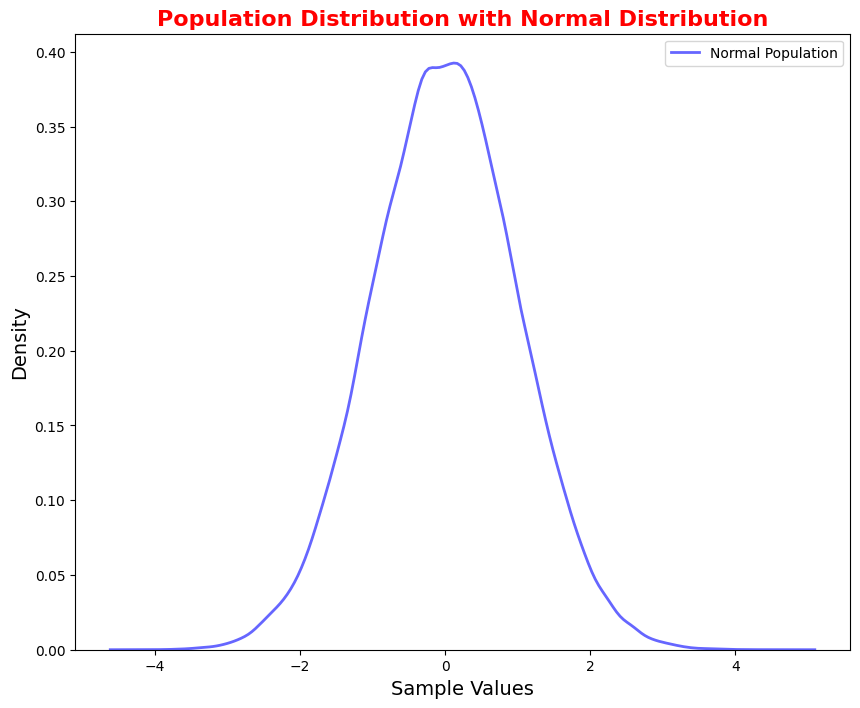

In [21]:
# Generate a normally distributed population
population = stats.norm(loc=0, scale=1)
population_samples = population.rvs(size=100000)

# Create the plot
plt.figure(figsize=(10, 8))

# Add a title with formatting
plt.title(
    "Population Distribution with Normal Distribution",
    fontdict={'fontsize': 16, 'fontweight': 'bold'},
    color='red'
)

# Plot the KDE for the population
sns.kdeplot(
    population_samples,
    color="blue",
    label="Normal Population",
    fill=False,
    alpha=0.6,
    linewidth=2
)

# Add axis labels with formatting
plt.xlabel("Sample Values", fontdict={'fontsize': 14})
plt.ylabel("Density", fontdict={'fontsize': 14})

# Add a legend
plt.legend()

# Show the plot
plt.show()

Let us sample from the population and plot sampling distribution. 

In [30]:
sample_size = 100 

number_of_samples = 1000
# Create a DataFrame to store the sample means 

sample_means = pd.DataFrame(columns = ['Sample_Means'])

# Generate a sample from the population 

sample = population.rvs(size = sample_size)

#Calculate the sample mean 

sample_mean = np.mean(sample)

# Append the sample mean to the DataFrame 
sample_means.loc[len(sample_means), 'Sample_Means'] = sample_mean

<Axes: ylabel='Density'>

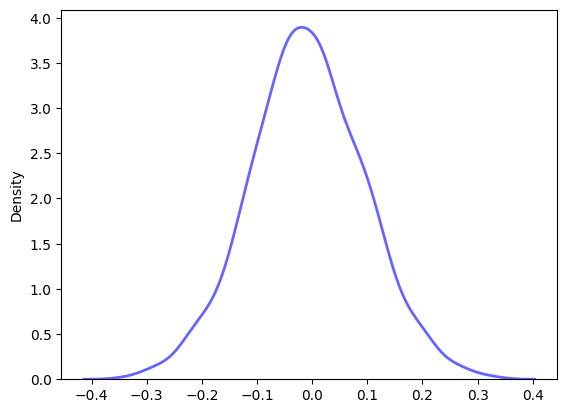

In [40]:
sample_means  = [population.rvs(size = sample_size).mean() for _ in range(number_of_samples)] 



sns.kdeplot(sample_means, color = "blue", label = "Sampling Distribution", fill = False, alpha = 0.6, linewidth = 2)


In [35]:
np.mean(sample_means), np.std(sample_means)

(np.float64(-0.0019250554937041966), np.float64(0.10018571901813565))

In [38]:
np.mean(population_samples), np.std(population_samples)

(np.float64(0.002171309519728368), np.float64(1.0021537163801262))

Skewed Distributions 

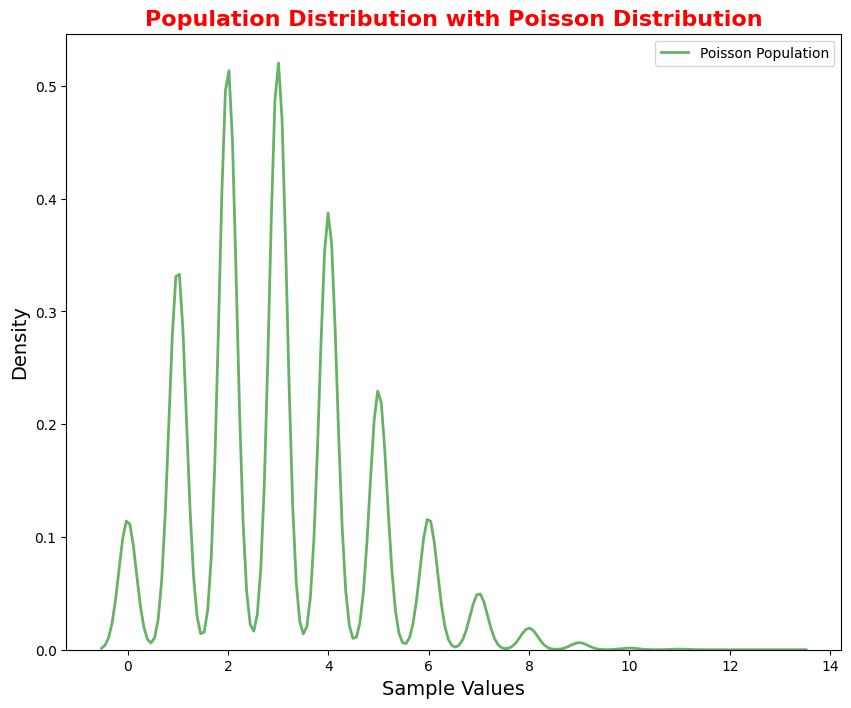

In [53]:
# Generate a Poisson distributed population
poisson_population = stats.poisson(mu=3)
poisson_samples = poisson_population.rvs(size=100000)

# Create the plot
plt.figure(figsize=(10, 8))

# Add a title with formatting
plt.title(
    "Population Distribution with Poisson Distribution",
    fontdict={'fontsize': 16, 'fontweight': 'bold'},
    color='red'
)

# Plot the KDE for the Poisson population
sns.kdeplot(
    poisson_samples,
    color="green",
    label="Poisson Population",
    fill=False,
    alpha=0.6,
    linewidth=2
)

# Add axis labels with formatting
plt.xlabel("Sample Values", fontdict={'fontsize': 14})
plt.ylabel("Density", fontdict={'fontsize': 14})

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [107]:
number_of_samples = 1000 

sample_size = 100

sample_means = [np.random.choice(poisson_samples, size = sample_size).mean() for _ in range(number_of_samples)]

In [108]:
np.std(sample_means), np.mean(sample_means) - np.mean(poisson_samples)

(np.float64(0.17071480779358303), np.float64(-0.00034000000000000696))

<Axes: ylabel='Density'>

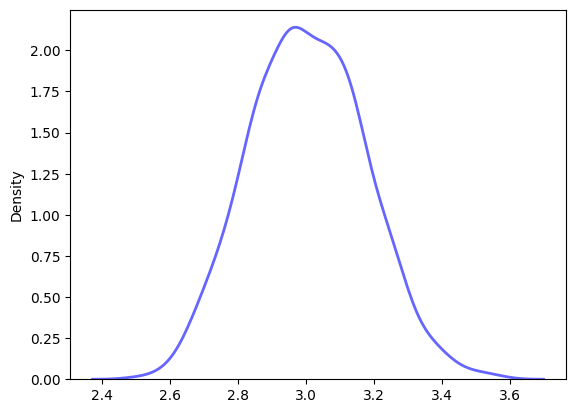

In [109]:
sns.kdeplot(
    sample_means, 
    color = "blue", 
    label = "Sampling Distribution for Poisson_with_100_samples", 
    fill = False, 
    alpha = 0.6, 
    linewidth = 2, 
)

In [110]:
number_of_samples = 10000

sample_size = 10000

sample_means = [np.random.choice(poisson_samples, size = sample_size).mean() for _ in range(number_of_samples)]

In [111]:
np.std(sample_means), np.mean(sample_means) - np.mean(poisson_samples)

(np.float64(0.017298750617035903), np.float64(-0.00020164000000022497))

<Axes: ylabel='Density'>

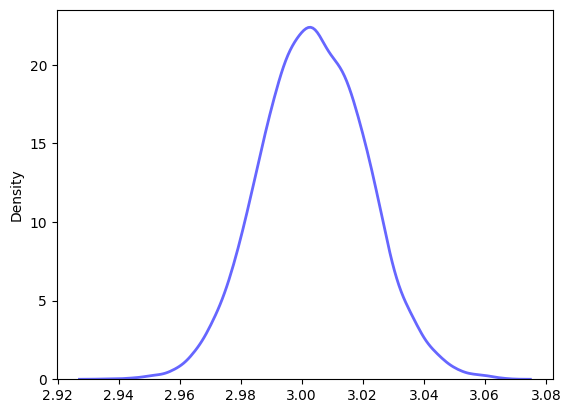

In [112]:
sns.kdeplot(
    sample_means, 
    color = "blue", 
    label = "Sampling Distribution for Poisson_with_1000_samples", 
    fill = False, 
    alpha = 0.6, 
    linewidth = 2, 
)

# when we increase the sample size by 100 times the standard deviation of the sampling distribution decreased by 17 times!

In addition the sampling distribution look more normal !

In [113]:
0.17 / 0.01

17.0